In [14]:
%matplotlib inline
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [13]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 3)


,V1,V2,V3
0,2.072345,-3.241693,14.62733
1,2.072345,15.784810,-0.37427
2,2.072345,7.319176,10.15795
3,2.072345,14.406780,19.45740
4,2.072345,2.557729,-6.23644


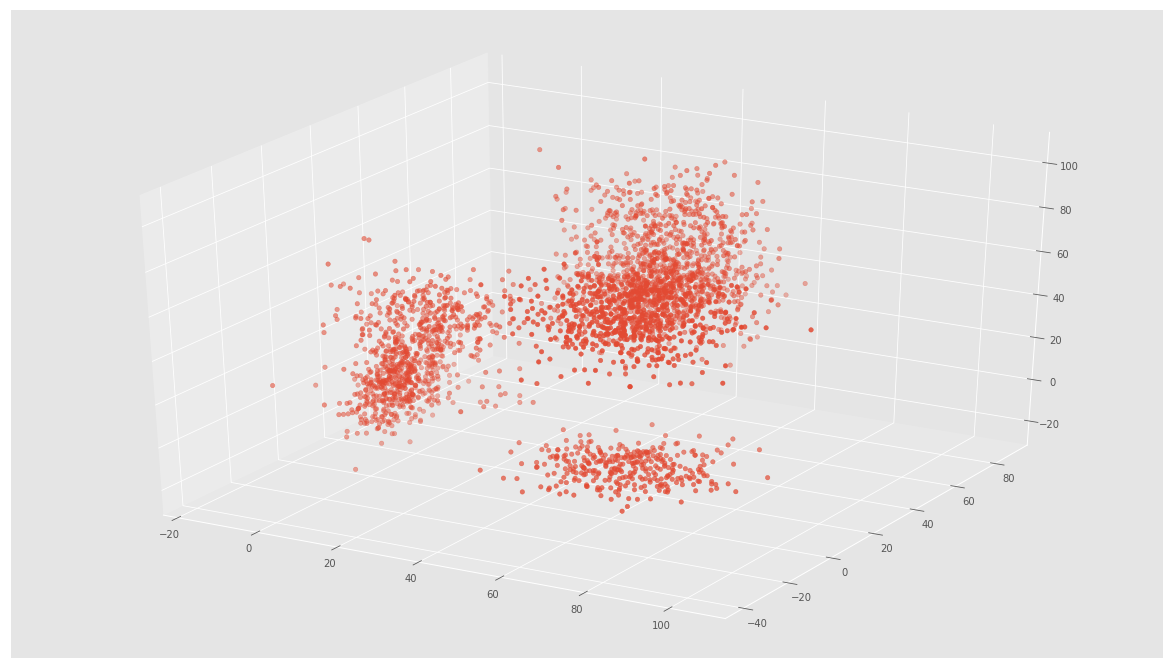

In [15]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
f3 = data['V3'].values
X = np.array(list(zip(f1, f2,f3)))
#plt.scatter(f1, f2, c='black', s=7)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [29]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
print(type(C_x))
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C_z = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y,C_z)), dtype=np.float32)
print(C)


<class 'numpy.ndarray'>
[[ 5. 23.  4.]
 [ 5. 47. 59.]
 [12. 20. 56.]]


In [26]:
# Plotting along with the Centroids
ax.scatter(f1, f2,f3, c='#050505', s=7)

ax.scatter(C_x, C_y,C_z ,marker='*', s=200, c='g')



In [27]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error >= 1:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        
        #print('distances', distances)
        cluster = np.argmin(distances)
        
        #print('cluster',cluster)
        clusters[i] = cluster
        #print('clusters[i]',clusters[i])
    # Storing the old centroid values
    C_old = deepcopy(C)
    print('C_old',C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        #print('points',points)
        C[i] = np.mean(points, axis=0)
        #print(' C[i]', C[i])
    error = dist(C, C_old, None)
    print('error',error)

C_old [[51. 16. 44.]
 [28. 56. 43.]
 [26. 71. 43.]]
error 27.568138
C_old [[45.46157  -3.017188 37.262726]
 [30.485891 46.45283  40.292263]
 [39.09738  71.02063  49.788364]]
error 18.90571
C_old [[47.113407 -4.949339 37.048866]
 [21.784744 36.733257 30.470774]
 [42.426872 64.1443   54.87828 ]]
error 31.210947
C_old [[64.71108  -9.281045 45.06389 ]
 [ 9.162625 18.85256  21.182747]
 [41.924618 61.197723 52.19471 ]]
error 10.398867
C_old [[ 69.69669  -10.063634  46.206985]
 [  5.586755  11.233079  20.71138 ]
 [ 40.84351   59.927475  49.453697]]
error 0.80495113


TypeError: scatter() got multiple values for argument 's'

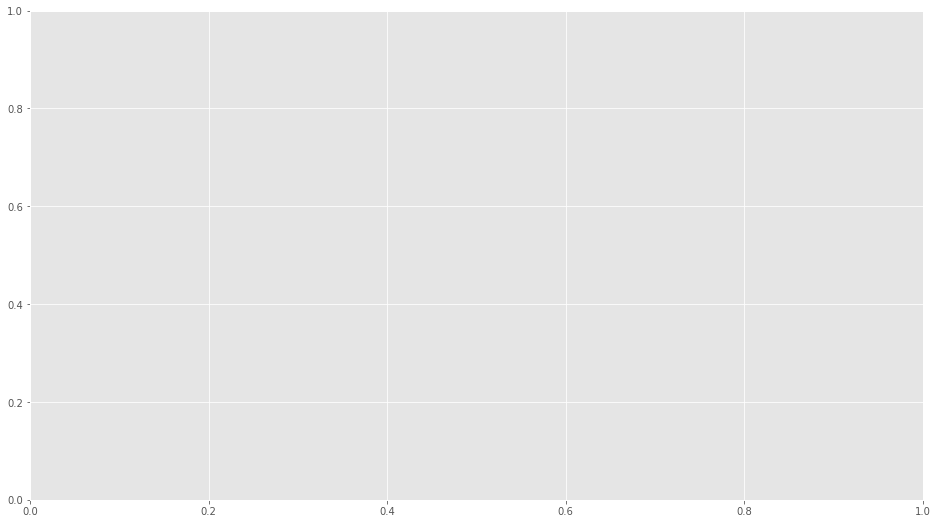

In [28]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', s=200, c='#050505')

"""
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])"""